In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Carregar os dados
df = pd.read_excel('/content/Base de dados (1).xlsx')

df.head()

,Country,Region,Rank 2019,Score 2019,GDP 2019,Family 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
0,Afghanistan,Southern Asia,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
1,Albania,Central and Eastern Europe,107,4.719,0.947,0.848,0.874,0.383,0.027,0.178
2,Algeria,Middle East and Northern Africa,88,5.211,1.002,1.160,0.785,0.086,0.114,0.073
3,Argentina,Latin America and Caribbean,47,6.086,1.092,1.432,0.881,0.471,0.050,0.066
4,Armenia,Central and Eastern Europe,116,4.559,0.850,1.055,0.815,0.283,0.064,0.095


In [ ]:
df = df.rename(columns={'Region':'Região', 'Rank 2019': 'Ranking','Score 2019':'Score',
                        'GDP 2019':'PIB per capita','Family 2019': 'Família','Life Expectancy 2019': 'Expectativa de vida',
                        'Freedom 2019': 'Liberdade', 'Trust 2019': 'Confiança','Country': 'País', 'Generosity 2019': 'Generosidade'})

In [ ]:
# Variáveis quantitativas para a análise de cluster
quantitative_data = df[['PIB per capita','Família','Expectativa de vida']]

# Padronizar os dados
from sklearn.preprocessing import MinMaxScaler

scaled_data = MinMaxScaler().fit_transform(quantitative_data)

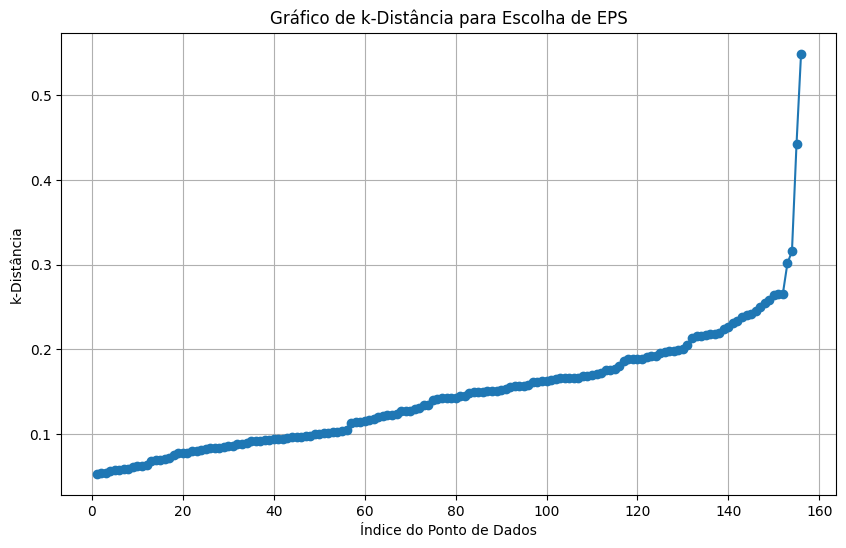

In [ ]:
#Definindo EPS
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# Calcule as k-distâncias
k = 12  # Defina o número de vizinhos mais próximos (ajuste conforme necessário)
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_data)  # Use seus dados padronizados
distances, _ = nbrs.kneighbors(scaled_data)

# Ordene as k-distâncias em ordem decrescente
k_distances = np.sort(distances[:, -1])

# Plote o gráfico de k-distância
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(k_distances) + 1), k_distances, marker='o')
plt.title('Gráfico de k-Distância para Escolha de EPS')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('k-Distância')
plt.grid(True)
#plt.ylim(0, 2)
# Exiba o gráfico
plt.show()

In [ ]:
# Realizar a clusterização com DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=20)  # Ajuste os parâmetros conforme necessário
clusters = dbscan.fit_predict(scaled_data)

In [ ]:
# Adicionar a coluna de grupos ao DataFrame original
df['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
df.to_excel('credito_com_grupos_Scan.xlsx', index=False)


# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = df.groupby('Cluster')[quantitative_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        PIB per capita         Família       Expectativa de vida      
                  mean count      mean count                mean count
Cluster                                                               
-1            0.741535   101  1.079822   101            0.618327   101
 0            1.329793    29  1.505379    29            0.992345    29
 1            1.067077    26  1.379115    26            0.842654    26


In [ ]:
lista1=[]
for idx,row in df.iterrows():
  if row['Cluster']==0:
    print(row['País'],row['Família'])
    lista1.append(row['País'])

Australia 1.548
Austria 1.475
Belgium 1.504
Canada 1.505
Czech Republic 1.487
Denmark 1.573
Estonia 1.528
Finland 1.587
France 1.472
Germany 1.454
Iceland 1.624
Ireland 1.553
Israel 1.455
Italy 1.488
Japan 1.419
Malta 1.52
Netherlands 1.522
New Zealand 1.557
Norway 1.582
Panama 1.442
Poland 1.438
Portugal 1.431
Slovakia 1.504
Slovenia 1.523
Spain 1.484
Sweden 1.487
Switzerland 1.526
Taiwan 1.43
United Kingdom 1.538


In [ ]:
lista2=[]
for idx,row in df.iterrows():
  if row['Cluster']==1:
    print(row['País'],row['Família'])
    lista2.append(row['País'])

Argentina 1.432
Belarus 1.465
Brazil 1.439
Bulgaria 1.513
Chile 1.369
Colombia 1.41
Costa Rica 1.441
Croatia 1.266
Dominican Republic 1.401
Ecuador 1.312
Hungary 1.41
Latvia 1.465
Lebanon 1.224
Lithuania 1.515
Mauritius 1.402
Mexico 1.323
Montenegro 1.361
North Macedonia 1.294
Peru 1.274
Romania 1.232
Serbia 1.383
Sri Lanka 1.265
Thailand 1.409
Turkey 1.36
Uruguay 1.465
Venezuela 1.427


In [ ]:
lista3=[]
for idx,row in df.iterrows():
  if row['Cluster']==-1:
    print(row['País'],row['Família'])
    lista3.append(row['País'])
print(len(lista1)+len(lista2)+len(lista3))

Afghanistan 0.517
Albania 0.848
Algeria 1.16
Armenia 1.055
Azerbaijan 1.147
Bahrain 1.368
Bangladesh 0.928
Benin 0.437
Bhutan 1.321
Bolivia 1.209
Bosnia and Herzegovina 1.212
Botswana 1.145
Burkina Faso 1.056
Burundi 0.447
Cambodia 1.122
Cameroon 0.91
Central African Republic 0.0
Chad 0.766
China 1.125
Comoros 0.757
Congo (Brazzaville) 0.799
Congo (Kinshasa) 1.125
Cyprus 1.223
Egypt 1.039
El Salvador 1.242
Ethiopia 1.033
Gabon 1.183
Gambia 0.939
Georgia 0.666
Ghana 0.868
Greece 1.156
Guatemala 1.269
Guinea 0.829
Haiti 0.688
Honduras 1.236
Hong Kong 1.277
India 0.765
Indonesia 1.203
Iran 0.842
Iraq 0.98
Ivory Coast 0.808
Jamaica 1.478
Jordan 1.225
Kazakhstan 1.508
Kenya 0.983
Kosovo 1.232
Kuwait 1.319
Kyrgyzstan 1.438
Laos 1.03
Lesotho 1.169
Liberia 0.922
Libya 1.303
Luxembourg 1.479
Madagascar 0.916
Malawi 0.56
Malaysia 1.171
Mali 1.105
Mauritania 1.167
Moldova 1.328
Mongolia 1.531
Morocco 0.782
Mozambique 0.986
Myanmar 1.181
Namibia 1.313
Nepal 1.226
Nicaragua 1.325
Niger 0.774
Nigeri

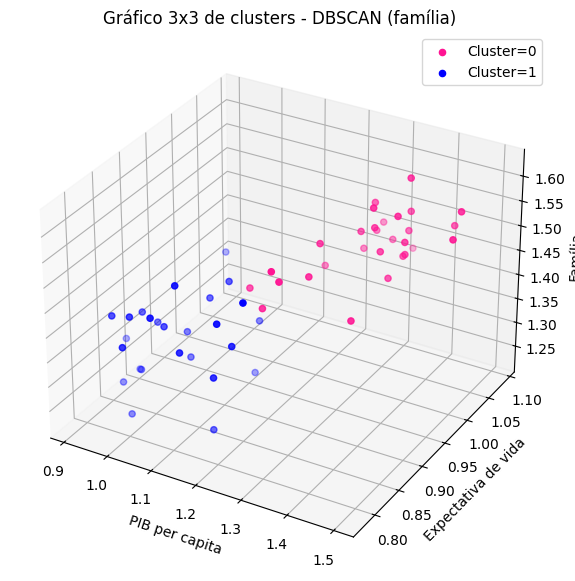

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
feature1 = 'PIB per capita'
feature2 = 'Expectativa de vida'
feature3 = 'Família'

# Set up figure
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

# Define our custom color list
color_list = ['deeppink', 'blue', 'forestgreen', 'orange', 'palegreen', 'darkviolet', 'moccasin', 'crimson', 'lightsteelblue', 'cyan']

# Iterate over each cluster, plotting on our figure
for i in range(df.Cluster.nunique()-1):
   label = "Cluster=" + str(i)
   ax.scatter3D(df[df.Cluster==i][feature1],
   df[df.Cluster==i][feature2],
   df[df.Cluster==i][feature3],
   c=color_list[i], label=label)

# Set labels and legend
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('Gráfico 3x3 de clusters - DBSCAN (família)')
ax.legend()
